# Beginner

## Task 01: Identify the author of a disputed medieval text using word frequencies.

Analyze the frequency of common words (e.g., "and," "the," "of") in the disputed text and compare it to known works of potential authors. This script aims to determine the likely author of a "disputed text" by comparing its writing style to known texts from several potential authors. The core idea is that each author has a unique pattern in their usage of common function words (e.g., "the," "of," "and").  By analyzing these patterns, we can assess which known author's style most closely matches the disputed text.

Hints:

- Use a frequency dictionary or word counting tool to simplify the process
- Focus on function words rather than content words, as they are less likely to change with subject matter.

**Steps**

1. **Libraries:**
   * `re`: Regular expressions for text processing.
   * `collections.Counter`: Counts word occurrences.
   * `matplotlib.pyplot`: Creates the visualization.
   * `numpy`:  Numerical operations for vectors and arrays.
   * `sklearn.metrics.pairwise.cosine_similarity`: Calculates cosine similarity.

2. **`get_word_freq` Function:**
   * Takes the text and a list of common words.
   * Cleans the text (lowercase, removes punctuation).
   * Counts how often each common word appears.
   * Calculates the frequency of each common word relative to the total number of words in the text.

3. **Load Texts:**
   * Replace placeholders (`disputed_text`, `author1_text`, etc.) with your actual text content.

4. **Common Words:**
   * A pre-defined list of 100 common function words to focus on.

5. **Calculate Frequencies:**
   * Calls `get_word_freq` for each text, creating dictionaries where keys are words and values are their frequencies.

6. **Create Frequency Vectors:**
   * Converts the dictionaries into numerical vectors (lists of numbers) representing the frequency of each word in the specified order.

7. **Calculate Cosine Similarities:**
   * Uses cosine similarity to measure the similarity between the disputed text's vector and each author's vector.  Cosine similarity considers the angle between vectors, not just their magnitudes, making it suitable for comparing relative word usage patterns.

8. **Visualization:**
   * Creates a heatmap to display the cosine similarity matrix.
   * Each cell shows the similarity between two texts.
   * Warmer colors indicate higher similarity.

9. **Output:**
   * Prints the name of the author whose known text is most similar to the disputed text based on cosine similarity.

**Interpreting the Results**

* **Heatmap:**  The diagonal of the heatmap will always be 1 (perfect similarity of a text to itself). The other cells show how similar each pair of texts is in terms of word usage patterns.
* **Most Similar Author:**  The printed output tells you which author's style appears to be the closest match for the disputed text.

**Important Considerations**

* **Text Length:** If texts vary greatly in length, the comparison might be skewed. Consider normalizing frequencies (e.g., by dividing by the total number of words in each text).
* **Choice of Words:** The `common_words` list is crucial. It should contain words that are frequent enough to provide meaningful comparisons but not so common that they lack distinctiveness between authors.
* **Authorship Complexity:** Authorship attribution can be very challenging, especially with short texts or texts deliberately trying to mimic another author's style. This script offers a starting point for analysis, but it's not foolproof.
       

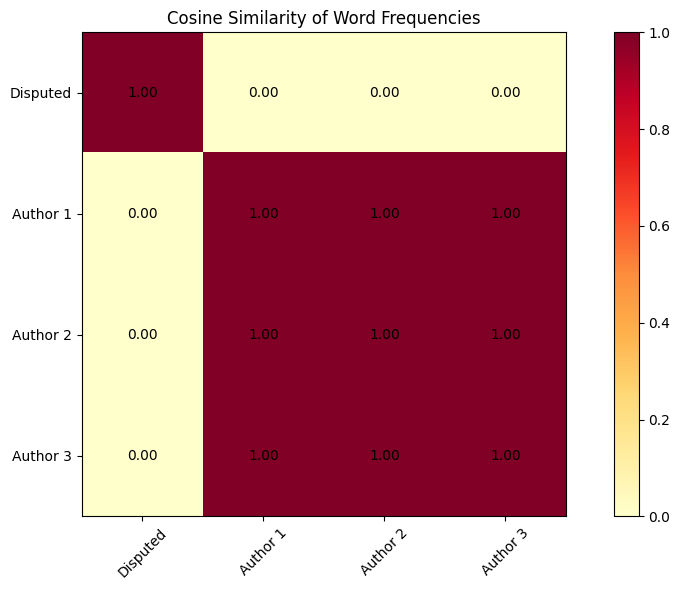

The disputed text is most similar to Author 1


In [ ]:
# Import necessary libraries
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Define function to count word frequencies
def get_word_freq(text, common_words):
    # Convert text to lowercase and split into words
    words = re.findall(r'\w+', text.lower())
    # Count occurrences of common words
    word_counts = Counter(words)
    # Calculate frequencies for common words
    freq_dict = {word: word_counts.get(word, 0) / len(words) for word in common_words}
    return freq_dict

"LOAD TEXT IN THE SIMILAR WAY"
disputed_text = "Your disputed text goes here..."
author1_text = "Known text by Author 1..."
author2_text = "Known text by Author 2..."
author3_text = "Known text by Author 3..."

# List of common function words to analyze
common_words = ['the', 'of', 'and', 'to', 'in', 'a', 'that', 'is', 'was', 'he', 'for', 'it', 'with', 'as', 'his', 'on', 'be', 'at', 'by', 'i', 'this', 'had', 'not', 'are', 'but', 'from', 'or', 'have', 'an', 'they', 'which', 'one', 'you', 'were', 'her', 'all', 'she', 'there', 'would', 'their', 'we', 'him', 'been', 'has', 'when', 'who', 'will', 'more', 'no', 'if', 'out', 'so', 'said', 'what', 'up', 'its', 'about', 'into', 'than', 'them', 'can', 'only', 'other', 'new', 'some', 'could', 'time', 'these', 'two', 'may', 'then', 'do', 'first', 'any', 'my', 'now', 'such', 'like', 'our', 'over', 'man', 'me', 'even', 'most', 'made', 'after', 'also', 'did', 'many', 'before', 'must', 'through', 'back', 'years', 'where', 'much', 'your', 'way', 'well', 'down', 'should', 'because', 'each', 'just', 'those', 'people', 'mr', 'how', 'too', 'little', 'state', 'good', 'very', 'make', 'world', 'still', 'own', 'see', 'men', 'work', 'long', 'get', 'here', 'between', 'both', 'life', 'being', 'under', 'never', 'day', 'same', 'another', 'know', 'while', 'last', 'might', 'us', 'great', 'old', 'year', 'off', 'come', 'since', 'against', 'go', 'came', 'right', 'used', 'take', 'three']

# Calculate word frequencies
disputed_freq = get_word_freq(disputed_text, common_words)
author1_freq = get_word_freq(author1_text, common_words)
author2_freq = get_word_freq(author2_text, common_words)
author3_freq = get_word_freq(author3_text, common_words)

# Convert frequency dictionaries to vectors
freq_vectors = np.array([list(disputed_freq.values()),
                         list(author1_freq.values()),
                         list(author2_freq.values()),
                         list(author3_freq.values())])

# Calculate cosine similarities
similarities = cosine_similarity(freq_vectors)

# Plot the results
authors = ['Disputed', 'Author 1', 'Author 2', 'Author 3']
plt.figure(figsize=(10, 6))
plt.imshow(similarities, cmap='YlOrRd')
plt.colorbar()
plt.xticks(range(len(authors)), authors, rotation=45)
plt.yticks(range(len(authors)), authors)
plt.title('Cosine Similarity of Word Frequencies')
for i in range(len(authors)):
    for j in range(len(authors)):
        plt.text(j, i, f'{similarities[i, j]:.2f}', ha='center', va='center')
plt.tight_layout()
plt.show()

# Print the most similar author
most_similar = np.argmax(similarities[0, 1:]) + 1
print(f"The disputed text is most similar to {authors[most_similar]}")

## Solution

1:This is a flexible task